In [2]:
#XINLEI HONG ICE_4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

interest = pd.read_csv("interest.csv")
difficulty = pd.read_csv("difficulty.csv")

#

In [40]:
interest

cols = ['prediction.interest','nlp.interest','sna.interest','neural.interest','viz.interest','loop.interest','sql.interest']
interest[cols].mean()
interest_mean = pd.DataFrame(interest[cols].mean())
interest_mean.index =['prediction', 'nlp','sna','neural','viz','loop','sql']
interest_mean.columns =['interest']
interest_mean


,interest
prediction,4.326923
nlp,4.431373
sna,4.134615
neural,4.490196
viz,4.596154
loop,4.431373
sql,4.431373


In [25]:
difficulty

cols = ['prediction.difficulty','nlp.difficulty','sna.difficulty','neural.difficulty','viz.difficulty','loop.difficulty','sql.difficulty']
difficulty[cols].mean()
difficulty_mean = pd.DataFrame(difficulty[cols].mean())
difficulty_mean.index =['prediction', 'nlp','sna','neural','viz','loop','sql']
difficulty_mean.columns =['difficulty']
difficulty_mean


,difficulty
prediction,3.807692
nlp,4.220000
sna,3.769231
neural,4.400000
viz,4.060000
loop,4.080000
sql,3.693878


In [29]:
difficulty_interest = pd.concat([difficulty_mean, interest_mean], axis=1, join='inner')
difficulty_interest

,difficulty,interest
prediction,3.807692,4.326923
nlp,4.220000,4.431373
sna,3.769231,4.134615
neural,4.400000,4.490196
viz,4.060000,4.596154
loop,4.080000,4.431373
sql,3.693878,4.431373


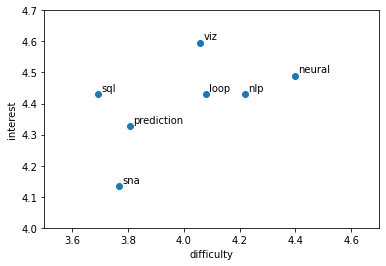

In [30]:
# Plot the basic scatter plot
plt.scatter(difficulty_interest.difficulty, difficulty_interest.interest)

# Add lables to each point
for i, index in enumerate (difficulty_interest.index):
    plt.text(difficulty_interest.difficulty[i]+0.01, difficulty_interest.interest[i]+0.01, index)
    
# Adjust the axis limit and label
plt.xlim (3.5, 4.7)
plt.ylim (4.0, 4.7)
plt.xlabel("difficulty")
plt.ylabel("interest");

In [31]:
import math # You will need math library to calculate the eulidician distance

# Create a new column called distance. And assign 0 to all rows temporarily.
difficulty_interest_distance = difficulty_interest.copy()
difficulty_interest_distance['distance'] = 0

# Pick any row to start. Here I am using prediction as an example
item = difficulty_interest_distance.loc['prediction',]

# Loop around the data frame index; Obtain the target row; Calculate the distance
# Assign to d; And assign to the corresponding cell.
for i in difficulty_interest_distance.index:
    target = difficulty_interest_distance.loc[i,]
    d = math.dist(item, target)
    difficulty_interest_distance.loc[i, 'distance'] = d

# Sort the result by distance
difficulty_interest_distance.sort_values('distance', ascending=True)

,difficulty,interest,distance
prediction,3.807692,4.326923,0.000000
sql,3.693878,4.431373,0.154478
sna,3.769231,4.134615,0.196116
loop,4.080000,4.431373,0.291652
viz,4.060000,4.596154,0.368977
nlp,4.220000,4.431373,0.425332
neural,4.400000,4.490196,0.614399


In [32]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(difficulty_interest)
cosine_sim

array([[1.        , 0.99922723, 0.99984605, 0.99856397, 0.99999823,
        0.99974724, 0.99964159],
       [0.99922723, 1.        , 0.99976308, 0.99989801, 0.99929948,
        0.99985835, 0.99781682],
       [0.99984605, 0.99976308, 1.        , 0.99935025, 0.99987732,
        0.99998782, 0.99901794],
       [0.99856397, 0.99989801, 0.99935025, 1.        , 0.99866309,
        0.999516  , 0.99677186],
       [0.99999823, 0.99929948, 0.99987732, 0.99866309, 1.        ,
        0.99978781, 0.99958939],
       [0.99974724, 0.99985835, 0.99998782, 0.999516  , 0.99978781,
        1.        , 0.99878705],
       [0.99964159, 0.99781682, 0.99901794, 0.99677186, 0.99958939,
        0.99878705, 1.        ]])

In [33]:
#create a index for the module
module_indices = pd.Series(range(len(difficulty_interest.index)), index = difficulty_interest.index)

module_indices

prediction    0
nlp           1
sna           2
neural        3
viz           4
loop          5
sql           6
dtype: int64

In [34]:
def get_recommendations(name, cosine_sim, matrix_indices):
    # Get the index of the movie that matches the title
    idx = matrix_indices[name]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:6]

    # Get the movie indices
    rank_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return matrix_indices.iloc[rank_indices]

In [35]:
get_recommendations("prediction", cosine_sim, module_indices)

viz     4
sna     2
loop    5
sql     6
nlp     1
dtype: int64

In [39]:
# First we need to clean up the dataset a little bit: Removing NaNs and naming rows
interest_na = interest.dropna()
interest_na.index = interest_na.id
interest_clean = interest_na.drop('id', axis=1)
interest_clean

,prediction.interest,nlp.interest,sna.interest,neural.interest,viz.interest,loop.interest,sql.interest
id,,,,,,,
s1,5,5.0,4,5.0,2,4.0,5.0
s2,5,5.0,5,5.0,5,5.0,5.0
s3,5,5.0,5,5.0,5,4.0,4.0
s4,4,5.0,5,5.0,5,5.0,5.0
s5,4,4.0,4,5.0,4,4.0,5.0
s6,5,5.0,5,5.0,5,5.0,5.0
s7,4,5.0,3,5.0,4,5.0,4.0
s8,4,4.0,3,4.0,5,4.0,4.0
s9,5,4.0,2,5.0,5,5.0,5.0


In [37]:
# Obtain the cosine similarity matrix
cosine_sim_interest = cosine_similarity(interest_clean, interest_clean)
# Create an index for the student list
id_indices = pd.Series(range(len(interest_clean.index)), index = interest_clean.index)

In [38]:
# Recycle the get_recommendations() that we have created
get_recommendations("s5", cosine_sim_interest, id_indices)

id
s2      1
s6      5
s12    11
s13    12
s16    15
dtype: int64